# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [3]:
%matplotlib inline
# import numpy and pandas
import numpy as np
import pandas as pd


# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [11]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [12]:
# Your code here:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [13]:
# Your code here:
fifa['ValueNumeric'] = fifa['Value'].str.extract(r'(\d+.\d+|\d+)').astype('float')
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110.5
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118.5
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102.0


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [15]:
fifa.rename(columns={"Preferred Foot": "Preferred_Foot"}, inplace= True)

In [49]:
# Your code here:
# In this case, we prefer not to pivot our data since the library will do it for us.
# The pivoting is performed internally by using the C function

from statsmodels.formula.api import ols
import statsmodels.api as sm

# We check by minimizing Ordinary Least Squares
model = ols('ValueNumeric ~ C(Preferred_Foot)*C(Position)', data=fifa).fit()
# Our result is the same p-value and our conclusion to reject remains the same.
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Preferred_Foot),7.292211e+04,1.0,0.872300,3.503319e-01
C(Position),8.767522e+06,26.0,4.033759,2.141952e-11
C(Preferred_Foot):C(Position),3.050243e+06,26.0,1.403355,8.327900e-02
Residual,1.512530e+09,18093.0,NaN,NaN


What is your conclusion from this ANOVA?

In [6]:
# HO = Position y Preferred Foot no influyen sobre el precio.
# pvalue < 0,5 en Position  -----> rechazamos HO
# pvalue > 0,5 en Preferred_Foot y Preferred_Foot+Position -----> no podemos rechazar HO 

#Para fines de interpretación, debe recordarse que la hipótesis nula es que las varianzas son iguales 
#entre sí y que, por lo tanto, la variable independiente no produce efectos sobre la dependiente. 
#La probabilidad de que la hipótesis nula sea verdadera se indica mediante el valor Pr (en otra parte, p).


#Por lo general, si se ha solucionado un error aceptable del 5%, aceptaremos la hipótesis H0 para valores 
#superiores a 0,05 mientras la rechazamos por valores más bajos.
# pvalue, en este caso PR(>F) es menor que 0.05 en una variable, por lo tanto rechazamos igualmente
#la hipotesis nula.

In [ ]:
# https://www.quora.com/What-is-the-meaning-of-Pr-F-in-Anova-Is-it-a-P-value
# https://www.agnesevardanega.eu/metref/r/analisi_bivariata/anova

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [53]:
# Your code here:

model = ols('ValueNumeric ~ C(Nationality)', data=fifa).fit()
# Our result is the same p-value and our conclusion to reject remains the same.
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Nationality),4.292914e+07,163.0,3.202987,1.976253e-38
Residual,1.483605e+09,18043.0,NaN,NaN


What is your conclusion from this ANOVA?

In [ ]:
# HO = Nationality no influye sobre el precio.
# pvalue < 0,5  -----> rechazamos HO
# pvalue > 0,5  -----> no podemos rechazar HO 

# el pvalue es < 05 así que rechazamos la HO, las variancias no son iguales, y la variable independiente
# Nacionalid influye en la variable dependiente precio del jugador

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [58]:
# Your code here:
fifa.dropna(how='any', axis=0, inplace=True)

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [71]:
# Your code here:

X = sm.add_constant(fifa[['Stamina', 'SprintSpeed']])
Y = fifa.ValueNumeric
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.454
Date:                Wed, 08 Jul 2020   Prob (F-statistic):             0.0116
Time:                        19:23:55   Log-Likelihood:            -1.2702e+05
No. Observations:               17918   AIC:                         2.540e+05
Df Residuals:                   17915   BIC:                         2.541e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         280.4297     10.390     26.991      0.000     260.065     300.795
Stamina        -0.5173      0.174     -2.978      0.003      -0.858      -0.177
SprintSpeed     0.3186      0.188      1.693      0.091      -0.050       0.688
==============================================================================
Omnibus:                     2098.571   Durbin-Watson:                   0.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2259.025
Skew:                           0.819   Prob(JB):                         0.00
Kurtosis:                       2.413   Cond. No.                         444.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [ ]:
# R-squared 0 o muy bajo + Prob (F-statistic) < 0.05 quiere decir que el modelo no explica 
# gran parte de la variación de los datos, pero es significativo

In [11]:
# Your conclusions here:
# Mi Promemoria!
# https://www.researchgate.net/post/What_is_the_relationship_between_R-squared_and_p-value_in_a_regression#:~:text=Institute%20of%20Statistics-,What%20is%20the%20relationship%20between%20R%2Dsquared%20and%20p%2Dvalue,and%20your%20p%2Dvalue%20rises.

#No existe una asociación / relación establecida entre el valor p y el R cuadrado. Todo esto depende de los datos (es decir, contextual).
#El valor R cuadrado le indica cuánta variación explica su modelo. Entonces 0.1 R cuadrado significa que su modelo explica el 10% de la variación dentro de los datos. Cuanto mayor sea el cuadrado R, mejor será el modelo. Mientras que el valor p le informa sobre la prueba de hipótesis estadística F del "ajuste del modelo de solo intercepción y su modelo es igual". Entonces, si el valor p es menor que el nivel de significancia (generalmente 0.05), entonces su modelo se ajusta bien a los datos.
#Por lo tanto, tiene cuatro escenarios:
#1) cuadrado R bajo y valor p bajo (valor p <= 0.05)
#2) bajo R cuadrado y alto valor p (valor p> 0.05)
#3) alto R cuadrado y bajo valor p
#4) alto R-cuadrado y alto p-valor
#Interpretación:
#1) significa que su modelo no explica gran parte de la variación de los datos, pero es significativo (mejor que no tener un modelo)
#2) significa que su modelo no explica mucha variación de los datos y no es significativo (peor de los casos)
#3) significa que su modelo explica muchas variaciones dentro de los datos y es significativo (mejor escenario)
#4) significa que su modelo explica muchas variaciones dentro de los datos pero no es significativo (el modelo no tiene valor)

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [76]:
# Your code here:

X = sm.add_constant(fifa['Potential'])
Y = fifa.ValueNumeric
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1054.
Date:                Wed, 08 Jul 2020   Prob (F-statistic):          9.15e-225
Time:                        19:59:10   Log-Likelihood:            -1.2651e+05
No. Observations:               17918   AIC:                         2.530e+05
Df Residuals:                   17916   BIC:                         2.530e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1062.4312     24.547     43.281      0.000    1014.316    1110.546
Potential    -11.1326      0.343    -32.469      0.000     -11.805     -10.461
==============================================================================
Omnibus:                     2018.008   Durbin-Watson:                   1.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2748.489
Skew:                           0.953   Prob(JB):                         0.00
Kurtosis:                       2.780   Cond. No.                         834.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
X = sm.add_constant(fifa['Overall'])
Y = fifa.ValueNumeric
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     1035.
Date:                Wed, 08 Jul 2020   Prob (F-statistic):          9.32e-221
Time:                        20:23:31   Log-Likelihood:            -1.2652e+05
No. Observations:               17918   AIC:                         2.531e+05
Df Residuals:                   17916   BIC:                         2.531e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        916.4400     20.258     45.239      0.000     876.733     956.147
Overall       -9.7844      0.304    -32.167      0.000     -10.381      -9.188
==============================================================================
Omnibus:                     2035.356   Durbin-Watson:                   1.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2742.463
Skew:                           0.948   Prob(JB):                         0.00
Kurtosis:                       2.722   Cond. No.                         640.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [13]:
# Your conclusions here:

# R-squared 0.055 quiere decir que modelo explica el 5.5% de  la variación dentro de los datos. 
# Prob (F-statistic) muchisimo menor que 0.05 quiere decir que el modelo es muy significativo

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

[  0. 975.]
-0.004991912485256224 72.66892449030965 -0.2357388990820484 9.154945284989039e-225 0.0001537444410029823


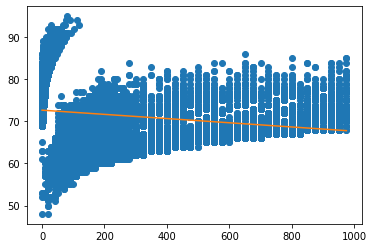

In [86]:
# Your code here:

import matplotlib.pyplot as plt
from scipy.stats import linregress

# The data
plt.plot(fifa.ValueNumeric, fifa.Potential,'o')
# The line
x = np.linspace(fifa.ValueNumeric.min(),fifa.ValueNumeric.max(),2)
print(x)
slope, intercept, r_value, p_value, std_err = linregress(fifa.ValueNumeric, fifa.Potential)
print(slope, intercept, r_value, p_value, std_err)
y = slope*x+intercept
plt.plot(x,y);
